In [0]:
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from datetime import datetime as dt
from sklearn import metrics
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%cd /content/gdrive/My Drive/Colab Notebooks/Walmart Store Sales Forecasting/data

/content/gdrive/My Drive/Colab Notebooks/Walmart Store Sales Forecasting/data


# Reading and Pre-Processing Data

In [0]:
train_data = pd.read_csv('train.csv')
features_data = pd.read_csv('features.csv')
stores_data = pd.read_csv('stores.csv')
test_data = pd.read_csv('test.csv')

In [0]:
train_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [0]:
train_data.shape

(421570, 5)

In [0]:
features_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [0]:
features_data.shape

(8190, 12)

In [0]:
stores_data.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [0]:
stores_data.shape

(45, 3)

## Merging the train, features and stores data

In [0]:
train_stores_merged_data = train_data.merge(stores_data, how='left', on=['Store'])

In [0]:
train_merged_data = train_stores_merged_data.merge(features_data, how='left', on=['Store','Date','IsHoliday']).fillna(0)

In [0]:
train_merged_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106


In [0]:
train_merged_data.shape

(421570, 16)

In [0]:
train_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     421570 non-null  float64
 10  MarkDown2     421570 non-null  float64
 11  MarkDown3     421570 non-null  float64
 12  MarkDown4     421570 non-null  float64
 13  MarkDown5     421570 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [0]:
train_merged_data['Date'] = pd.to_datetime(train_merged_data['Date'])

In [0]:
train_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     421570 non-null  float64       
 10  MarkDown2     421570 non-null  float64       
 11  MarkDown3     421570 non-null  float64       
 12  MarkDown4     421570 non-null  float64       
 13  MarkDown5     421570 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

In [0]:
train_merged_data['IsHolidayInt']=train_merged_data.IsHoliday.map({False:0,True:1})

In [0]:
train_merged_data['Store_Dept_Date'] = train_merged_data['Store'].astype(str) + "_" + train_merged_data['Dept'].astype(str) + "_"+ train_merged_data['Date'].astype(str)
train_merged_data['Store_Dept_Date'].head()

0    1_1_2010-02-05
1    1_1_2010-02-12
2    1_1_2010-02-19
3    1_1_2010-02-26
4    1_1_2010-03-05
Name: Store_Dept_Date, dtype: object

In [0]:
train_merged_data.set_index('Store_Dept_Date', inplace=True)

In [0]:
train_merged_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHolidayInt
Store_Dept_Date,,,,,,,,,,,,,,,,,
1_1_2010-02-05,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0
1_1_2010-02-12,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,1
1_1_2010-02-19,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0
1_1_2010-02-26,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0
1_1_2010-03-05,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0


Drop Date and IsHoliday columns

In [0]:
train_merged_data.drop(['IsHoliday', 'Date'], axis=1, inplace=True)

In [0]:
train_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421570 entries, 1_1_2010-02-05 to 45_98_2012-10-26
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Weekly_Sales  421570 non-null  float64
 3   Type          421570 non-null  object 
 4   Size          421570 non-null  int64  
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     421570 non-null  float64
 8   MarkDown2     421570 non-null  float64
 9   MarkDown3     421570 non-null  float64
 10  MarkDown4     421570 non-null  float64
 11  MarkDown5     421570 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  IsHolidayInt  421570 non-null  int64  
dtypes: float64(10), int64(4), object(1)
memory usage: 51.5+ MB


## Creating list of categorical and numerical variables

In [0]:
cat_var_names=['Store', 'Dept', 'Type']
print(cat_var_names)

['Store', 'Dept', 'Type']


In [0]:
num_var_names = []
for col in train_merged_data.columns:
    if col not in cat_var_names:
        num_var_names.append(col)

print(num_var_names)

['Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHolidayInt']


## Handling Numerical Data

In [0]:
train_num_data=train_merged_data[num_var_names]

In [0]:
train_num_data.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHolidayInt
Store_Dept_Date,,,,,,,,,,,,
1_1_2010-02-05,24924.50,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0
1_1_2010-02-12,46039.49,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,1
1_1_2010-02-19,41595.55,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0
1_1_2010-02-26,19403.54,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0
1_1_2010-03-05,21827.90,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0


In [0]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [0]:
num_summary=train_num_data.apply(lambda x: var_summary(x)).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Weekly_Sales,421570.0,0.0,6.737219e+09,15981.258123,7612.03000,22711.183519,5.157979e+08,-4988.940,5.000000,59.974500,291.097000,2079.650000,7612.03000,20205.852500,42845.673000,61201.951000,106479.586000,693099.360000
Size,421570.0,0.0,5.764039e+10,136727.915739,140167.00000,60980.583328,3.718632e+09,34875.000,34875.000000,39690.000000,39910.000000,93638.000000,140167.00000,202505.000000,204184.000000,206302.000000,219622.000000,219622.000000
Temperature,421570.0,0.0,2.533217e+07,60.090059,62.09000,18.447931,3.403262e+02,-2.060,18.300000,27.310000,33.980000,46.680000,62.09000,74.280000,83.580000,87.270000,92.810000,100.140000
Fuel_Price,421570.0,0.0,1.416908e+06,3.361027,3.45200,0.458515,2.102356e-01,2.472,2.565000,2.653000,2.720000,2.933000,3.45200,3.738000,3.917000,4.029000,4.202000,4.468000
MarkDown1,421570.0,0.0,1.091898e+09,2590.074819,0.00000,6052.385934,3.663138e+07,0.000,0.000000,0.000000,0.000000,0.000000,0.00000,2809.050000,8624.560000,12407.710000,28177.290000,88646.760000
MarkDown2,421570.0,0.0,3.709708e+08,879.974298,0.00000,5084.538801,2.585253e+07,-265.760,0.000000,0.000000,0.000000,0.000000,0.00000,2.200000,452.880000,3789.560000,21813.160000,104519.540000
MarkDown3,421570.0,0.0,1.973317e+08,468.087665,0.00000,5528.873453,3.056844e+07,-29.100,0.000000,0.000000,0.000000,0.000000,0.00000,4.540000,74.410000,216.170000,2083.280000,141630.610000
MarkDown4,421570.0,0.0,4.566161e+08,1083.132268,0.00000,3894.529945,1.516736e+07,0.000,0.000000,0.000000,0.000000,0.000000,0.00000,425.290000,2828.890000,5163.630000,16822.460000,67474.850000
MarkDown5,421570.0,0.0,7.009750e+08,1662.772385,0.00000,4207.629321,1.770414e+07,0.000,0.000000,0.000000,0.000000,0.000000,0.00000,2168.040000,5284.630000,7456.150000,15590.530000,108519.280000
CPI,421570.0,0.0,7.217360e+07,171.201947,182.31878,39.159276,1.533449e+03,126.064,126.111903,126.496258,128.823806,132.022667,182.31878,212.416993,219.444244,221.941558,225.473509,227.232807


### Handling outliers

In [0]:
def outlier_capping(x):
    x.clip(lower=x.quantile(0.01), upper=x.quantile(0.99), inplace=True)
    return x

train_num_data=train_num_data.apply(lambda x: outlier_capping(x))

In [0]:
#pandas_profiling.ProfileReport(train_num_data)

## Handling Categorical Data

In [0]:
train_cat_data=train_merged_data[cat_var_names]

In [0]:
train_cat_data.head()

,Store,Dept,Type
Store_Dept_Date,,,
1_1_2010-02-05,1,1,A
1_1_2010-02-12,1,1,A
1_1_2010-02-19,1,1,A
1_1_2010-02-26,1,1,A
1_1_2010-03-05,1,1,A


In [0]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

In [0]:
cat_var_summary=train_cat_data.apply(lambda x: cat_summary(x))
cat_var_summary

,Store,Dept,Type
N,421570,421570,421570
NMISS,0,0,0
ColumnsNames,13 10474 10 10315 4 10272 1 1024...,1 6435 10 6435 38 6435 21 6435 67...,A 215478 B 163495 C 42597 Name: Type...


### Finding list of most imtportant Depts using Random Forest model

In [0]:
train_dept_data = train_merged_data[['Dept','Weekly_Sales']]

In [0]:
train_dept_data.head()

,Dept,Weekly_Sales
Store_Dept_Date,,
1_1_2010-02-05,1,24924.50
1_1_2010-02-12,1,46039.49
1_1_2010-02-19,1,41595.55
1_1_2010-02-26,1,19403.54
1_1_2010-03-05,1,21827.90


In [0]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

#### Creating Dept Dummies

In [0]:
train_dept_data['Dept'] = train_dept_data['Dept'].astype('category')
train_dept_data = create_dummies(train_dept_data , 'Dept' )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
train_dept_data.shape

(421570, 81)

In [0]:
train_dept_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421570 entries, 1_1_2010-02-05 to 45_98_2012-10-26
Data columns (total 81 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Weekly_Sales  421570 non-null  float64
 1   Dept_2        421570 non-null  uint8  
 2   Dept_3        421570 non-null  uint8  
 3   Dept_4        421570 non-null  uint8  
 4   Dept_5        421570 non-null  uint8  
 5   Dept_6        421570 non-null  uint8  
 6   Dept_7        421570 non-null  uint8  
 7   Dept_8        421570 non-null  uint8  
 8   Dept_9        421570 non-null  uint8  
 9   Dept_10       421570 non-null  uint8  
 10  Dept_11       421570 non-null  uint8  
 11  Dept_12       421570 non-null  uint8  
 12  Dept_13       421570 non-null  uint8  
 13  Dept_14       421570 non-null  uint8  
 14  Dept_16       421570 non-null  uint8  
 15  Dept_17       421570 non-null  uint8  
 16  Dept_18       421570 non-null  uint8  
 17  Dept_19       421570 non-null 

#### Fitting Random Forest Model

In [0]:
dept_radm_reg = RandomForestRegressor(n_estimators=100)

In [0]:
dept_X_col_list = train_dept_data.columns.difference(['Weekly_Sales'])
dept_X_col_list

Index(['Dept_10', 'Dept_11', 'Dept_12', 'Dept_13', 'Dept_14', 'Dept_16',
       'Dept_17', 'Dept_18', 'Dept_19', 'Dept_2', 'Dept_20', 'Dept_21',
       'Dept_22', 'Dept_23', 'Dept_24', 'Dept_25', 'Dept_26', 'Dept_27',
       'Dept_28', 'Dept_29', 'Dept_3', 'Dept_30', 'Dept_31', 'Dept_32',
       'Dept_33', 'Dept_34', 'Dept_35', 'Dept_36', 'Dept_37', 'Dept_38',
       'Dept_39', 'Dept_4', 'Dept_40', 'Dept_41', 'Dept_42', 'Dept_43',
       'Dept_44', 'Dept_45', 'Dept_46', 'Dept_47', 'Dept_48', 'Dept_49',
       'Dept_5', 'Dept_50', 'Dept_51', 'Dept_52', 'Dept_54', 'Dept_55',
       'Dept_56', 'Dept_58', 'Dept_59', 'Dept_6', 'Dept_60', 'Dept_65',
       'Dept_67', 'Dept_7', 'Dept_71', 'Dept_72', 'Dept_74', 'Dept_77',
       'Dept_78', 'Dept_79', 'Dept_8', 'Dept_80', 'Dept_81', 'Dept_82',
       'Dept_83', 'Dept_85', 'Dept_87', 'Dept_9', 'Dept_90', 'Dept_91',
       'Dept_92', 'Dept_93', 'Dept_94', 'Dept_95', 'Dept_96', 'Dept_97',
       'Dept_98', 'Dept_99'],
      dtype='object')

In [0]:
dept_radm_reg.fit( train_dept_data[dept_X_col_list], train_dept_data['Weekly_Sales'] )

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
indices = np.argsort(dept_radm_reg.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_dept_data[dept_X_col_list].shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_dept_data[dept_X_col_list].columns[indices[f]],
                         dept_radm_reg.feature_importances_[indices[f]]]

In [0]:
feature_rank

,rank,feature,importance
0,1,Dept_92,0.195621
1,2,Dept_95,0.168264
2,3,Dept_38,0.123205
3,4,Dept_72,0.072341
4,5,Dept_90,0.059250
...,...,...,...
75,76,Dept_33,0.000292
76,77,Dept_6,0.000289
77,78,Dept_24,0.000265
78,79,Dept_39,0.000050


#### List of top 20 Depts

In [0]:
feature_rank.feature.head(20)

0     Dept_92
1     Dept_95
2     Dept_38
3     Dept_72
4     Dept_90
5     Dept_40
6      Dept_2
7     Dept_91
8     Dept_94
9     Dept_13
10     Dept_8
11    Dept_93
12     Dept_4
13     Dept_7
14    Dept_23
15    Dept_79
16     Dept_5
17     Dept_9
18    Dept_46
19    Dept_10
Name: feature, dtype: object

In [0]:
top_dept_list = feature_rank.feature.head(20).values.tolist()
top_dept_list

['Dept_92',
 'Dept_95',
 'Dept_38',
 'Dept_72',
 'Dept_90',
 'Dept_40',
 'Dept_2',
 'Dept_91',
 'Dept_94',
 'Dept_13',
 'Dept_8',
 'Dept_93',
 'Dept_4',
 'Dept_7',
 'Dept_23',
 'Dept_79',
 'Dept_5',
 'Dept_9',
 'Dept_46',
 'Dept_10']

### Create Dummies on Store and Type Columns

In [0]:
# Drop Dept from train_cat_data
train_cat_data.drop('Dept', axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
train_cat_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421570 entries, 1_1_2010-02-05 to 45_98_2012-10-26
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Store   421570 non-null  int64 
 1   Type    421570 non-null  object
dtypes: int64(1), object(1)
memory usage: 9.6+ MB


In [0]:
cat_var_names = ['Store', 'Type']

In [0]:
for c_feature in cat_var_names:
    train_cat_data = create_dummies(train_cat_data , c_feature )

In [0]:
train_cat_data.head()

,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,Store_11,Store_12,Store_13,Store_14,Store_15,Store_16,Store_17,Store_18,Store_19,Store_20,Store_21,Store_22,Store_23,Store_24,Store_25,Store_26,Store_27,Store_28,Store_29,Store_30,Store_31,Store_32,Store_33,Store_34,Store_35,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45,Type_B,Type_C
Store_Dept_Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1_1_2010-02-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1_1_2010-02-12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1_1_2010-02-19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1_1_2010-02-26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1_1_2010-03-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
train_cat_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421570 entries, 1_1_2010-02-05 to 45_98_2012-10-26
Data columns (total 46 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   Store_2   421570 non-null  uint8
 1   Store_3   421570 non-null  uint8
 2   Store_4   421570 non-null  uint8
 3   Store_5   421570 non-null  uint8
 4   Store_6   421570 non-null  uint8
 5   Store_7   421570 non-null  uint8
 6   Store_8   421570 non-null  uint8
 7   Store_9   421570 non-null  uint8
 8   Store_10  421570 non-null  uint8
 9   Store_11  421570 non-null  uint8
 10  Store_12  421570 non-null  uint8
 11  Store_13  421570 non-null  uint8
 12  Store_14  421570 non-null  uint8
 13  Store_15  421570 non-null  uint8
 14  Store_16  421570 non-null  uint8
 15  Store_17  421570 non-null  uint8
 16  Store_18  421570 non-null  uint8
 17  Store_19  421570 non-null  uint8
 18  Store_20  421570 non-null  uint8
 19  Store_21  421570 non-null  uint8
 20  Store_22  421570 non-null  uin

### Concatenate Depts dummies with Store and Type Dummies

In [0]:
train_cat_merged_data = pd.merge(train_cat_data, train_dept_data[top_dept_list], left_index=True, right_index=True)
train_cat_merged_data.head()

,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,Store_11,Store_12,Store_13,Store_14,Store_15,Store_16,Store_17,Store_18,Store_19,Store_20,Store_21,Store_22,Store_23,Store_24,Store_25,Store_26,Store_27,Store_28,Store_29,Store_30,Store_31,Store_32,Store_33,Store_34,Store_35,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45,Type_B,Type_C,Dept_92,Dept_95,Dept_38,Dept_72,Dept_90,Dept_40,Dept_2,Dept_91,Dept_94,Dept_13,Dept_8,Dept_93,Dept_4,Dept_7,Dept_23,Dept_79,Dept_5,Dept_9,Dept_46,Dept_10
Store_Dept_Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1_1_2010-02-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1_1_2010-02-12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1_1_2010-02-19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1_1_2010-02-26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1_1_2010-03-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
train_cat_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421570 entries, 1_1_2010-02-05 to 45_98_2012-10-26
Data columns (total 66 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   Store_2   421570 non-null  uint8
 1   Store_3   421570 non-null  uint8
 2   Store_4   421570 non-null  uint8
 3   Store_5   421570 non-null  uint8
 4   Store_6   421570 non-null  uint8
 5   Store_7   421570 non-null  uint8
 6   Store_8   421570 non-null  uint8
 7   Store_9   421570 non-null  uint8
 8   Store_10  421570 non-null  uint8
 9   Store_11  421570 non-null  uint8
 10  Store_12  421570 non-null  uint8
 11  Store_13  421570 non-null  uint8
 12  Store_14  421570 non-null  uint8
 13  Store_15  421570 non-null  uint8
 14  Store_16  421570 non-null  uint8
 15  Store_17  421570 non-null  uint8
 16  Store_18  421570 non-null  uint8
 17  Store_19  421570 non-null  uint8
 18  Store_20  421570 non-null  uint8
 19  Store_21  421570 non-null  uint8
 20  Store_22  421570 non-null  uin

## Concatenate Numerical and Categorical datasets

In [0]:
train_cat_num_merged_data = pd.merge(train_num_data, train_cat_merged_data, left_index=True, right_index=True)
train_cat_num_merged_data.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHolidayInt,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,Store_11,Store_12,Store_13,Store_14,Store_15,Store_16,Store_17,Store_18,Store_19,Store_20,Store_21,Store_22,Store_23,Store_24,Store_25,Store_26,Store_27,Store_28,Store_29,Store_30,Store_31,Store_32,Store_33,Store_34,Store_35,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45,Type_B,Type_C,Dept_92,Dept_95,Dept_38,Dept_72,Dept_90,Dept_40,Dept_2,Dept_91,Dept_94,Dept_13,Dept_8,Dept_93,Dept_4,Dept_7,Dept_23,Dept_79,Dept_5,Dept_9,Dept_46,Dept_10
Store_Dept_Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1_1_2010-02-05,24924.50,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1_1_2010-02-12,46039.49,151315,38.51,2.565,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1_1_2010-02-19,41595.55,151315,39.93,2.565,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1_1_2010-02-26,19403.54,151315,46.63,2.565,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1_1_2010-03-05,21827.90,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
train_cat_num_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421570 entries, 1_1_2010-02-05 to 45_98_2012-10-26
Data columns (total 78 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Weekly_Sales  421570 non-null  float64
 1   Size          421570 non-null  int64  
 2   Temperature   421570 non-null  float64
 3   Fuel_Price    421570 non-null  float64
 4   MarkDown1     421570 non-null  float64
 5   MarkDown2     421570 non-null  float64
 6   MarkDown3     421570 non-null  float64
 7   MarkDown4     421570 non-null  float64
 8   MarkDown5     421570 non-null  float64
 9   CPI           421570 non-null  float64
 10  Unemployment  421570 non-null  float64
 11  IsHolidayInt  421570 non-null  int64  
 12  Store_2       421570 non-null  uint8  
 13  Store_3       421570 non-null  uint8  
 14  Store_4       421570 non-null  uint8  
 15  Store_5       421570 non-null  uint8  
 16  Store_6       421570 non-null  uint8  
 17  Store_7       421570 non-null 

In [0]:
train_cat_num_merged_data.shape

(421570, 78)

# Feature Selection

## Selecting features using Correlation matrix

In [0]:
feature_cols_list = train_cat_num_merged_data.corr().iloc[0,:].abs().sort_values(ascending=False)
feature_cols_list

Weekly_Sales    1.000000
Dept_92         0.297231
Dept_95         0.293878
Dept_38         0.269326
Size            0.252562
                  ...   
Store_32        0.004836
Store_22        0.004160
Fuel_Price      0.001395
Temperature     0.000733
Store_18        0.000026
Name: Weekly_Sales, Length: 78, dtype: float64

In [0]:
top_feature_cols_list = feature_cols_list.head(41).index.tolist()
top_feature_cols_list

['Weekly_Sales',
 'Dept_92',
 'Dept_95',
 'Dept_38',
 'Size',
 'Dept_72',
 'Dept_40',
 'Dept_90',
 'Dept_2',
 'Type_B',
 'Dept_91',
 'Dept_94',
 'Type_C',
 'Store_20',
 'Store_4',
 'Dept_13',
 'Dept_8',
 'Store_14',
 'Store_13',
 'Store_10',
 'Store_5',
 'Store_2',
 'Store_3',
 'Dept_93',
 'MarkDown5',
 'Store_27',
 'Dept_4',
 'Store_44',
 'MarkDown3',
 'Store_33',
 'Store_16',
 'Store_29',
 'MarkDown1',
 'Store_7',
 'Store_38',
 'Store_15',
 'MarkDown4',
 'Store_9',
 'Dept_23',
 'Store_6',
 'Dept_7']

## Selecting Features by VIF method

In [0]:
all_columns = "+".join(top_feature_cols_list)

#print(all_columns)

my_formula = "Weekly_Sales~" + all_columns

print(my_formula)

Weekly_Sales~Weekly_Sales+Dept_92+Dept_95+Dept_38+Size+Dept_72+Dept_40+Dept_90+Dept_2+Type_B+Dept_91+Dept_94+Type_C+Store_20+Store_4+Dept_13+Dept_8+Store_14+Store_13+Store_10+Store_5+Store_2+Store_3+Dept_93+MarkDown5+Store_27+Dept_4+Store_44+MarkDown3+Store_33+Store_16+Store_29+MarkDown1+Store_7+Store_38+Store_15+MarkDown4+Store_9+Dept_23+Store_6+Dept_7


In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [0]:
y, X = dmatrices('Weekly_Sales~Dept_92+Dept_95+Dept_38+Size+Dept_72+Dept_40+Dept_90+Dept_2+Type_B+Dept_91+Dept_94+Type_C+Store_20+Store_4+Dept_13+Dept_8+Store_14+Store_13+Store_10+Store_5+Store_2+Store_3+Dept_93+MarkDown5+Store_27+Dept_4+Store_44+MarkDown3+Store_33+Store_16+Store_29+MarkDown1+Store_7+Store_38+Store_15+MarkDown4+Store_9+Dept_23+Store_6+Dept_7-1'
, train_cat_num_merged_data, return_type='dataframe')

In [0]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [0]:
vif

,VIF Factor,features
0,1.019399,Dept_92
1,1.019399,Dept_95
2,1.019399,Dept_38
3,2.628771,Size
4,1.018772,Dept_72
5,1.019399,Dept_40
6,1.019399,Dept_90
7,1.019399,Dept_2
8,2.402891,Type_B
9,1.019399,Dept_91


In [0]:
drop_col_list = []
while (1):
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns
    max_vif=vif['VIF Factor'].max()
    max_vif_coeff=vif.loc[vif['VIF Factor'].idxmax()]['features']

    if max_vif > 10.00:
        print("Dropping ", max_vif_coeff ," as its VIF "+ str(max_vif) + " > 10.00 and re-calculate VIF")
        X.drop(max_vif_coeff,axis=1,inplace=True)
        drop_col_list = drop_col_list.append(max_vif_coeff)
        #train_cat_num_merged_data.drop(max_vif_coeff,axis=1,inplace=True)
        
    else:
        break
vif.round(1)

,VIF Factor,features
0,1.0,Dept_92
1,1.0,Dept_95
2,1.0,Dept_38
3,2.6,Size
4,1.0,Dept_72
5,1.0,Dept_40
6,1.0,Dept_90
7,1.0,Dept_2
8,2.4,Type_B
9,1.0,Dept_91


In [0]:
drop_col_list

[]

No columns are dropped using VIF method

In [0]:
train_top_features_data = train_cat_num_merged_data[top_feature_cols_list]

In [0]:
train_top_features_data.shape

(421570, 41)

In [0]:
train_top_features_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421570 entries, 1_1_2010-02-05 to 45_98_2012-10-26
Data columns (total 41 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Weekly_Sales  421570 non-null  float64
 1   Dept_92       421570 non-null  uint8  
 2   Dept_95       421570 non-null  uint8  
 3   Dept_38       421570 non-null  uint8  
 4   Size          421570 non-null  int64  
 5   Dept_72       421570 non-null  uint8  
 6   Dept_40       421570 non-null  uint8  
 7   Dept_90       421570 non-null  uint8  
 8   Dept_2        421570 non-null  uint8  
 9   Type_B        421570 non-null  uint8  
 10  Dept_91       421570 non-null  uint8  
 11  Dept_94       421570 non-null  uint8  
 12  Type_C        421570 non-null  uint8  
 13  Store_20      421570 non-null  uint8  
 14  Store_4       421570 non-null  uint8  
 15  Dept_13       421570 non-null  uint8  
 16  Dept_8        421570 non-null  uint8  
 17  Store_14      421570 non-null 

## Feature selection through Recursive Feature Elimination

In [0]:
import statsmodels.api as sm

In [0]:
#Splitting Dependent and Independent Features

feature_columns = train_top_features_data.columns.difference(['Weekly_Sales'])
feature_columns

Index(['Dept_13', 'Dept_2', 'Dept_23', 'Dept_38', 'Dept_4', 'Dept_40',
       'Dept_7', 'Dept_72', 'Dept_8', 'Dept_90', 'Dept_91', 'Dept_92',
       'Dept_93', 'Dept_94', 'Dept_95', 'MarkDown1', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'Size', 'Store_10', 'Store_13', 'Store_14', 'Store_15',
       'Store_16', 'Store_2', 'Store_20', 'Store_27', 'Store_29', 'Store_3',
       'Store_33', 'Store_38', 'Store_4', 'Store_44', 'Store_5', 'Store_6',
       'Store_7', 'Store_9', 'Type_B', 'Type_C'],
      dtype='object')

In [0]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split( train_top_features_data[feature_columns],
                                                  train_top_features_data['Weekly_Sales'],
                                                  test_size = 0.3,
                                                  random_state = 123 )
train_X = sm.add_constant(train_X)
test_X = sm.add_constant(test_X)

In [0]:
print( len( train_X ))
print( len( test_X))

295099
126471


In [0]:
lm=sm.OLS(train_Y,train_X).fit()

while (1):
    lm=sm.OLS(train_Y,train_X).fit()
    
    df = pd.DataFrame(lm.pvalues)
    df.reset_index(inplace=True)
    df.columns = ['coeff', 'pvalue']

    max_pvalue=df['pvalue'].max()
    max_pvalue_coeff=df.loc[df['pvalue'].idxmax()]['coeff']

    if max_pvalue > 0.05:
        print("Dropping ", max_pvalue_coeff ," as its P-Value " + str(max_pvalue) + " > 5% and rebuild the model")
        train_X.drop(max_pvalue_coeff,axis=1,inplace=True)
        test_X.drop(max_pvalue_coeff,axis=1,inplace=True)
        
        
    else:
        break
lm.summary()

Dropping  MarkDown4  as its P-Value 0.09360103480805432 > 5% and rebuild the model
Dropping  MarkDown1  as its P-Value 0.20674854194532272 > 5% and rebuild the model
Dropping  MarkDown5  as its P-Value 0.09840401613024949 > 5% and rebuild the model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                 1.227e+04
Date:                Mon, 20 Apr 2020   Prob (F-statistic):               0.00
Time:                        15:52:18   Log-Likelihood:            -3.2150e+06
No. Observations:              295099   AIC:                         6.430e+06
Df Residuals:                  295061   BIC:                         6.431e+06
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1823.9981    197.180     -9.250      0.000   -2210.466   -1437.530
Dept_13     2.295e+04    196.156    116.984      0.000    2.26e+04    2.33e+04
Dept_2       3.55e+04    197.003    180.181      0.000    3.51e+04    3.59e+04
Dept_23     1.519e+04    206.140     73.687      0.000    1.48e+04    1.56e+04
Dept_38     5.271e+04    196.634    268.054      0.000    5.23e+04    5.31e+04
Dept_4      1.811e+04    197.154     91.863      0.000    1.77e+04    1.85e+04
Dept_40     3.717e+04    196.591    189.064      0.000    3.68e+04    3.76e+04
Dept_7      1.517e+04    197.604     76.764      0.000    1.48e+04    1.56e+04
Dept_72     3.836e+04    203.469    188.542      0.000     3.8e+04    3.88e+04
Dept_8      2.219e+04    196.837    112.716      0.000    2.18e+04    2.26e+04
Dept_90     3.704e+04    195.808    189.143      0.000    3.67e+04    3.74e+04
Dept_91     2.559e+04    196.273    130.391      0.000    2.52e+04     2.6e+04
Dept_92     5.712e+04    195.823    291.694      0.000    5.67e+04    5.75e+04
Dept_93     1.848e+04    204.507     90.371      0.000    1.81e+04    1.89e+04
Dept_94     2.534e+04    207.127    122.338      0.000    2.49e+04    2.57e+04
Dept_95     5.699e+04    196.307    290.311      0.000    5.66e+04    5.74e+04
MarkDown3      2.8424      0.095     29.823      0.000       2.656       3.029
Size           0.0666      0.001     61.361      0.000       0.064       0.069
Store_10    1.118e+04    161.829     69.073      0.000    1.09e+04    1.15e+04
Store_13    6285.6068    164.843     38.131      0.000    5962.519    6608.694
Store_14    8052.6760    163.675     49.199      0.000    7731.877    8373.475
Store_15   -5148.6205    165.560    -31.098      0.000   -5473.114   -4824.127
Store_16   -1867.0613    180.655    -10.335      0.000   -2221.139   -1512.983
Store_2     7065.9510    162.525     43.476      0.000    6747.407    7384.495
Store_20    9138.4451    162.628     56.192      0.000    8819.698    9457.192
Store_27    5040.5460    161.913     31.131      0.000    4723.200    5357.892
Store_29   -4250.8225    169.418    -25.091      0.000   -4582.877   -3918.768
Store_3    -2338.3487    192.926    -12.120      0.000   -2716.478   -1960.220
Store_33   -4518.1970    246.985    -18.293      0.000   -5002.280   -4034.114
Store_38   -3142.4796    204.140    -15.394      0.000   -3542.589   -2742.371
Store_4     8847.8538    162.329     54.506      0.000    8529.693    9166.015
Store_44   -4920.2563    206.003    -23.884      0.000   -5324.016   -4516.496
Store_5    -3471.0903    194.548    -17.842      0.000   -3852.399   -3089.782
Store_6     3110.5092    161.916     19.211      0.000    2793.157    3427.861
Store_7    -2390.6882    174.078    -13.733      0.000   -2731.877   -2049.500
Store_9    -5979.7846    173.829    -34.400      0.000   -6320.484   -5639.085
Ty

In [0]:
feature_columns = train_X.columns
feature_columns

Index(['const', 'Dept_13', 'Dept_2', 'Dept_23', 'Dept_38', 'Dept_4', 'Dept_40',
       'Dept_7', 'Dept_72', 'Dept_8', 'Dept_90', 'Dept_91', 'Dept_92',
       'Dept_93', 'Dept_94', 'Dept_95', 'MarkDown3', 'Size', 'Store_10',
       'Store_13', 'Store_14', 'Store_15', 'Store_16', 'Store_2', 'Store_20',
       'Store_27', 'Store_29', 'Store_3', 'Store_33', 'Store_38', 'Store_4',
       'Store_44', 'Store_5', 'Store_6', 'Store_7', 'Store_9', 'Type_B',
       'Type_C'],
      dtype='object')

# Explore different regression models and determine the best model for the prediction

## Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict

In [0]:
train_X = sm.add_constant(train_X)
test_X = sm.add_constant(test_X)

In [0]:
lm = LinearRegression()
lm.fit(train_X, train_Y)
lm.predict(test_X)

array([46617.86631203,   957.186203  ,  2176.83923912, ...,
        1416.45149803,  6643.51862717,  6978.17783737])

In [0]:
lm.score(train_X, train_Y)

0.6060400548376681

In [0]:
linear_regression_score = lm.score(test_X,test_Y)
linear_regression_score

0.6056371529629543

In [0]:
rootMeanSquaredErrorLinReg=np.sqrt(mean_squared_error(train_Y, lm.predict(train_X)))

In [0]:
print("rmse_train Linear Regression= " + str(rootMeanSquaredErrorLinReg))

rmse_train Linear Regression= 13040.778890906318


In [0]:
rootMeanSquaredErrorLinReg=np.sqrt(mean_squared_error(test_Y, lm.predict(test_X)))

In [0]:
print("rmse_test Linear Regression= " + str(rootMeanSquaredErrorLinReg))

rmse_test Linear Regression= 13057.703618024285


In [0]:
y_pred_test = lm.predict(test_X)

In [0]:
residuals = test_Y - y_pred_test

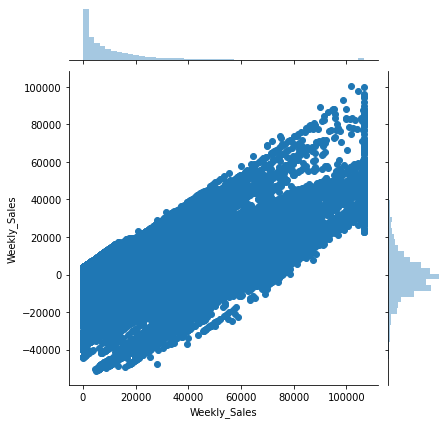

In [0]:
sns.jointplot(  test_Y, residuals )

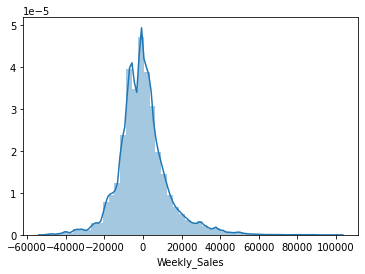

In [0]:
sns.distplot( residuals )

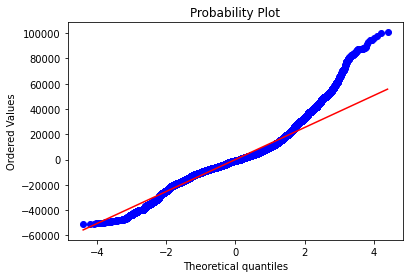

In [0]:
# To ensure residues are random i.e. normally distributed a Q-Q plot can be used
# Q-Q plot shows if the residuals are plotted along the line.
from scipy import stats
import pylab

stats.probplot( residuals, dist="norm", plot=pylab )
pylab.show()

## Ensemble Models

### Random Forest

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict

In [0]:
train_X.drop('const', axis=1, inplace=True)
test_X.drop('const', axis=1, inplace=True)

In [0]:
param_grid = {'max_depth': np.arange(3, 8) , 'max_features': np.arange(3,20) , 'min_samples_split': np.arange(30,40) }

In [0]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [0]:
# May take hours to execute
rf = GridSearchCV(RandomForestRegressor(oob_score=True,n_estimators=10, n_jobs=-1 ), 
                        param_grid, 
                        cv=10)
rf.fit(train_X, train_Y)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=-1,
                                             oob_score=True, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [0]:
rf.best_params_

{'max_depth': 7, 'max_features': 14, 'min_samples_split': 37}

In [0]:
radm_reg = RandomForestRegressor(oob_score=True,n_estimators=100, max_features=14, min_samples_split=37,max_depth=7)
radm_reg.fit( train_X, train_Y )

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features=14, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=37, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
random_forest_score = radm_reg.score(test_X,test_Y)
random_forest_score

0.5752216285261578

In [0]:
radm_test_pred_cv = cross_val_predict(radm_reg, test_X,test_Y, cv=10 )

metrics.r2_score(test_Y, radm_test_pred_cv)

0.5777007900831644

In [0]:
radm_reg.oob_score_

0.5717400072857175

In [0]:
rootMeanSquaredErrorRadmForest=np.sqrt(mean_squared_error(train_Y, radm_reg.predict(train_X)))
print("rmse_train Random Forest= " + str(rootMeanSquaredErrorRadmForest))

rmse_train Random Forest= 13561.411443085392


In [0]:
rootMeanSquaredErrorRadmForest=np.sqrt(mean_squared_error(test_Y, radm_reg.predict(test_X)))
print("rmse_test Random Forest= " + str(rootMeanSquaredErrorRadmForest))

rmse_test Random Forest= 13551.894372414883


### Decision Tree

In [0]:
from sklearn.tree import DecisionTreeRegressor

In [0]:
param_grid = {'max_depth': np.arange(3,8),
             'max_features': np.arange(3,feature_columns.size),
              'min_samples_split': np.arange(30,40)
             }

In [0]:
# May take hours to execute
tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 10)
tree.fit( train_X, train_Y )

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([3, 4, 5, 6, 7]),
                         'max_features': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 

In [0]:
tree.best_params_

{'max_depth': 7, 'max_features': 36, 'min_samples_split': 39}

In [0]:
reg_tree = DecisionTreeRegressor( max_depth = 7, max_features=36, min_samples_split=39 )
reg_tree.fit( train_X, train_Y )

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=36, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=39,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [0]:
tree_test_pred = pd.DataFrame( { 'actual':  test_Y,
                            'predicted': reg_tree.predict( test_X ) } )

In [0]:
tree_test_pred.sample( n = 10 )

,actual,predicted
Store_Dept_Date,,
22_27_2012-06-15,1615.82,8859.306349
12_26_2011-07-22,10823.31,8859.306349
3_11_2012-06-01,19064.27,8859.306349
25_81_2010-10-29,7224.12,8859.306349
40_18_2010-10-15,6292.35,8859.306349
40_14_2010-08-20,11486.14,8859.306349
43_16_2010-12-31,1308.09,8859.306349
31_87_2011-12-16,9142.76,16664.869425
42_94_2011-06-17,34642.46,8859.306349


In [0]:
decision_tree_score = reg_tree.score(test_X,test_Y)
decision_tree_score

0.5255501309347584

In [0]:
tree_test_pred_cv = cross_val_predict(reg_tree, test_X,test_Y, cv=10 )

In [0]:
metrics.r2_score(test_Y, tree_test_pred_cv)

0.5281531441410785

In [0]:
rootMeanSquaredErrorDT=np.sqrt(mean_squared_error(train_Y, reg_tree.predict(train_X)))

In [0]:
print("rmse_train Decision Tree= " + str(rootMeanSquaredErrorDT))

rmse_train Decision Tree= 14312.605587997177


In [0]:
rootMeanSquaredErrorDT=np.sqrt(mean_squared_error(test_Y, reg_tree.predict(test_X)))

In [0]:
print("rmse_test Decision Tree= " + str(rootMeanSquaredErrorDT))

rmse_test Decision Tree= 14322.339883200833


### Bagging

In [0]:
from sklearn.ensemble import BaggingRegressor

In [0]:
param_grid = {'max_features': np.arange(3,feature_columns.size)}

In [0]:
# May take hours to execute
bag_reg = GridSearchCV(BaggingRegressor(), param_grid, cv = 10)
bag_reg.fit( train_X, train_Y )

GridSearchCV(cv=10, error_score=nan,
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'max_features': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
bag_reg.best_params_

{'max_features': 37}

In [0]:
bag_reg = BaggingRegressor(oob_score=True, n_estimators=100, max_features = 37)
bag_reg.fit(train_X, train_Y)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=37, max_samples=1.0, n_estimators=100,
                 n_jobs=None, oob_score=True, random_state=None, verbose=0,
                 warm_start=False)

In [0]:
y_pred = pd.DataFrame( { 'actual':  test_Y, 'predicted': bag_reg.predict( test_X) } )

In [0]:
bagging_score = bag_reg.score(test_X,test_Y)
bagging_score

0.8063260456416239

In [0]:
bag_test_pred_cv = cross_val_predict(bag_reg, test_X,test_Y, cv=10 )

In [0]:
metrics.r2_score(test_Y, bag_test_pred_cv)

0.8038087493709845

In [0]:
rootMeanSquaredErrorBag=np.sqrt(mean_squared_error(train_Y, bag_reg.predict(train_X)))
print("rmse_train Bagging= " + str(rootMeanSquaredErrorBag))

rmse_train Bagging= 8884.6525893344


In [0]:
rootMeanSquaredErrorBag=np.sqrt(mean_squared_error(test_Y, bag_reg.predict(test_X)))
print("rmse_test Bagging= " + str(rootMeanSquaredErrorBag))

rmse_test Bagging= 9150.702162386759


In [0]:
bag_reg.oob_score_

0.8062302426886949

# Pre-Processing Test dataset

In [0]:
test_data.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


## Merging Test, Features and Stores datasets

In [0]:
test_stores_merged_data = test_data.merge(stores_data, how='left', on=['Store'])

In [0]:
test_merged_data = test_stores_merged_data.merge(features_data, how='left', on=['Store','Date','IsHoliday']).fillna(0)

In [0]:
test_merged_data.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573
2,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573
3,1,1,2012-11-23,True,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573
4,1,1,2012-11-30,False,A,151315,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,223.610984,6.573


In [0]:
test_merged_data['Date'] = pd.to_datetime(test_merged_data['Date'])

In [0]:
test_merged_data['IsHolidayInt'] = test_merged_data.IsHoliday.map({False:0,True:1})

In [0]:
test_merged_data['Store_Dept_Date'] = test_merged_data['Store'].astype(str) + "_" + test_merged_data['Dept'].astype(str) + "_"+ test_merged_data['Date'].astype(str)
test_merged_data['Store_Dept_Date'].head()

0    1_1_2012-11-02
1    1_1_2012-11-09
2    1_1_2012-11-16
3    1_1_2012-11-23
4    1_1_2012-11-30
Name: Store_Dept_Date, dtype: object

In [0]:
test_merged_data.set_index('Store_Dept_Date', inplace=True)
test_merged_data.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHolidayInt
Store_Dept_Date,,,,,,,,,,,,,,,,
1_1_2012-11-02,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,0
1_1_2012-11-09,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,0
1_1_2012-11-16,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,0
1_1_2012-11-23,1,1,2012-11-23,True,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,1
1_1_2012-11-30,1,1,2012-11-30,False,A,151315,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,223.610984,6.573,0


In [0]:
test_merged_data.drop(['IsHoliday', 'Date'], axis=1, inplace=True)

In [0]:
cat_var_names=['Store', 'Dept', 'Type']
print(cat_var_names)

['Store', 'Dept', 'Type']


In [0]:
num_var_names = []
for col in test_merged_data.columns:
    if col not in cat_var_names:
        num_var_names.append(col)

print(num_var_names)

['Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHolidayInt']


## Handling Numeric data

In [0]:
test_num_data = test_merged_data[num_var_names]

In [0]:
test_num_data.apply(lambda x: var_summary(x)).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Size,115064.0,0.0,1.570597e+10,136497.688921,140167.000000,61106.926438,3.734056e+09,34875.000,34875.000,39690.0000,39910.000,93638.000,140167.000000,202505.00000,204184.000000,206302.000000,219622.000000,219622.000000
Temperature,115064.0,0.0,6.206760e+06,53.941804,54.470000,18.724153,3.505939e+02,-7.290,11.440,23.9800,29.970,39.820,54.470000,67.35000,79.480000,83.820000,92.140000,101.950000
Fuel_Price,115064.0,0.0,4.121070e+05,3.581546,3.606000,0.239442,5.733244e-02,2.872,2.957,3.1610,3.227,3.431,3.606000,3.76600,3.866000,3.951000,4.079000,4.125000
MarkDown1,115064.0,0.0,8.836063e+08,7679.259430,4828.720000,10695.406505,1.143917e+08,-2781.450,17.010,178.4305,448.820,1963.550,4828.720000,9427.41000,15325.040000,23140.880000,65757.570000,103184.980000
MarkDown2,115064.0,0.0,3.227602e+08,2805.049619,316.880000,7392.556347,5.464989e+07,-35.740,0.000,0.0000,0.000,0.000,316.880000,1575.85000,6665.520000,15810.180000,38836.380000,71074.170000
MarkDown3,115064.0,0.0,2.528890e+08,2197.811964,60.000000,13183.888087,1.738149e+08,-179.260,0.000,0.0000,0.240,7.770,60.000000,244.20000,649.000000,1621.470000,82544.960000,149483.310000
MarkDown4,115064.0,0.0,3.429250e+08,2980.298267,600.580000,7212.030921,5.201339e+07,0.000,0.000,0.0000,0.000,70.370,600.580000,2627.85000,7170.570000,12723.810000,43631.940000,65344.640000
MarkDown5,115064.0,0.0,4.513594e+08,3922.681189,2390.430000,19445.150745,3.781139e+08,-185.170,269.300,540.8900,770.883,1309.300,2390.430000,4227.27000,6966.340000,9316.710000,18599.300000,771448.100000
CPI,115064.0,0.0,1.360868e+07,118.270541,138.402033,89.878361,8.078120e+03,0.000,0.000,0.0000,0.000,0.000,138.402033,201.21223,224.635985,227.251326,228.642888,228.976456
Unemployment,115064.0,0.0,5.282193e+05,4.590657,5.771000,3.483338,1.213364e+01,0.000,0.000,0.0000,0.000,0.000,5.771000,7.29300,8.667000,8.951000,10.199000,10.199000


### Handling outliers

In [0]:
test_num_data=test_num_data.apply(lambda x: outlier_capping(x))

## Handling Categorical data

In [0]:
test_cat_data = test_merged_data[cat_var_names]

In [0]:
test_cat_data.head()

,Store,Dept,Type
Store_Dept_Date,,,
1_1_2012-11-02,1,1,A
1_1_2012-11-09,1,1,A
1_1_2012-11-16,1,1,A
1_1_2012-11-23,1,1,A
1_1_2012-11-30,1,1,A


In [0]:
test_cat_data.apply(lambda x: cat_summary(x))

,Store,Dept,Type
N,115064,115064,115064
NMISS,0,0,0
ColumnsNames,13 2836 4 2803 19 2799 2 2797 27...,1 1755 13 1755 91 1755 90 1755 21...,"A 58713 B 44500 C 11851 Name: Type, d..."


### Creating Dummies for Categorical columns

In [0]:
for c_feature in cat_var_names:
    test_cat_data = create_dummies(test_cat_data , c_feature )

In [0]:
test_cat_data.head()

,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,Store_11,Store_12,Store_13,Store_14,Store_15,Store_16,Store_17,Store_18,Store_19,Store_20,Store_21,Store_22,Store_23,Store_24,Store_25,Store_26,Store_27,Store_28,Store_29,Store_30,Store_31,Store_32,Store_33,Store_34,Store_35,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,...,Dept_45,Dept_46,Dept_47,Dept_48,Dept_49,Dept_50,Dept_51,Dept_52,Dept_54,Dept_55,Dept_56,Dept_58,Dept_59,Dept_60,Dept_65,Dept_67,Dept_71,Dept_72,Dept_74,Dept_77,Dept_78,Dept_79,Dept_80,Dept_81,Dept_82,Dept_83,Dept_85,Dept_87,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_B,Type_C
Store_Dept_Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1_1_2012-11-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1_1_2012-11-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1_1_2012-11-16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1_1_2012-11-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1_1_2012-11-30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Concatenate Numerical and Categorical datasets

In [0]:
test_cat_num_merged_data = pd.merge(test_num_data, test_cat_data, left_index=True, right_index=True)
test_cat_num_merged_data.head()

,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHolidayInt,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,Store_11,Store_12,Store_13,Store_14,Store_15,Store_16,Store_17,Store_18,Store_19,Store_20,Store_21,Store_22,Store_23,Store_24,Store_25,Store_26,Store_27,Store_28,Store_29,Store_30,...,Dept_45,Dept_46,Dept_47,Dept_48,Dept_49,Dept_50,Dept_51,Dept_52,Dept_54,Dept_55,Dept_56,Dept_58,Dept_59,Dept_60,Dept_65,Dept_67,Dept_71,Dept_72,Dept_74,Dept_77,Dept_78,Dept_79,Dept_80,Dept_81,Dept_82,Dept_83,Dept_85,Dept_87,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_B,Type_C
Store_Dept_Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1_1_2012-11-02,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1_1_2012-11-09,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1_1_2012-11-16,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1_1_2012-11-23,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1_1_2012-11-30,151315,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,223.610984,6.573,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
feature_columns = test_X.columns
feature_columns

Index(['Dept_13', 'Dept_2', 'Dept_23', 'Dept_38', 'Dept_4', 'Dept_40',
       'Dept_7', 'Dept_72', 'Dept_8', 'Dept_90', 'Dept_91', 'Dept_92',
       'Dept_93', 'Dept_94', 'Dept_95', 'MarkDown3', 'Size', 'Store_10',
       'Store_13', 'Store_14', 'Store_15', 'Store_16', 'Store_2', 'Store_20',
       'Store_27', 'Store_29', 'Store_3', 'Store_33', 'Store_38', 'Store_4',
       'Store_44', 'Store_5', 'Store_6', 'Store_7', 'Store_9', 'Type_B',
       'Type_C'],
      dtype='object')

In [0]:
test_top_features_data = test_cat_num_merged_data[feature_columns]

In [0]:
test_top_features_data.head()

,Dept_13,Dept_2,Dept_23,Dept_38,Dept_4,Dept_40,Dept_7,Dept_72,Dept_8,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,MarkDown3,Size,Store_10,Store_13,Store_14,Store_15,Store_16,Store_2,Store_20,Store_27,Store_29,Store_3,Store_33,Store_38,Store_4,Store_44,Store_5,Store_6,Store_7,Store_9,Type_B,Type_C
Store_Dept_Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1_1_2012-11-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50.82,151315,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1_1_2012-11-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40.28,151315,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1_1_2012-11-16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,103.78,151315,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1_1_2012-11-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,74910.32,151315,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1_1_2012-11-30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3838.35,151315,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Comparing scores of different regression models and determine the best model for the prediction

In [0]:
print("Linear Regression Model  = " + str(linear_regression_score))
print("Random Forest Model Score = " + str(random_forest_score))
print("Decision Tree Model Score = " + str(decision_tree_score))
print("Bagging Model Score= " + str(bagging_score))

Linear Regression Model  = 0.6056371529629543
Random Forest Model Score = 0.5752216285261578
Decision Tree Model Score = 0.5255501309347584
Bagging Model Score= 0.8063260456416239


Of all the models, Bagging Regressor model has the best score
## Using Bagging Regressor model to predict Sales for Test dataset.

In [0]:
test_merged_data['Weekly_Sales_Predicted'] = bag_reg.predict(test_top_features_data)

In [0]:
test_merged_data.head()

,Store,Dept,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHolidayInt,Weekly_Sales_Predicted
Store_Dept_Date,,,,,,,,,,,,,,,
1_1_2012-11-02,1,1,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,0,8163.720432
1_1_2012-11-09,1,1,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,0,9800.008760
1_1_2012-11-16,1,1,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,0,14113.608322
1_1_2012-11-23,1,1,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,1,16514.128346
1_1_2012-11-30,1,1,A,151315,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,223.610984,6.573,0,16514.128346


In [0]:
test_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115064 entries, 1_1_2012-11-02 to 45_98_2013-07-26
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Store                   115064 non-null  int64  
 1   Dept                    115064 non-null  int64  
 2   Type                    115064 non-null  object 
 3   Size                    115064 non-null  int64  
 4   Temperature             115064 non-null  float64
 5   Fuel_Price              115064 non-null  float64
 6   MarkDown1               115064 non-null  float64
 7   MarkDown2               115064 non-null  float64
 8   MarkDown3               115064 non-null  float64
 9   MarkDown4               115064 non-null  float64
 10  MarkDown5               115064 non-null  float64
 11  CPI                     115064 non-null  float64
 12  Unemployment            115064 non-null  float64
 13  IsHolidayInt            115064 non-null  int64  
 14  We

## Export Predicted Weekly Sales in Excel format for Submission

In [0]:
test_merged_data.to_excel("Submition.xlsx")